 # <b> Predict Breast Cancer<b>
    
    
<b> Logistic Regression </b> is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In this asssignmet we will predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated.

<b> Table of Contents: </b>    
1. Importing Packages
2. Exploratory Data Analysis
3. Feature selection
4. Splitting the dataset into train and test sets
5. Fitting a logistic regression model to the train set
6. Making predictions and evaluating performance
7. Classification report
8. Receiver Operating Characteristic (ROC)
7. Model Stability
8. References

## 1. Importing Packages

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')
%matplotlib inline

In [2]:
#Viewing dataset
df = pd.read_csv('data/cancer.data', header=None)

## 2. Exploratory Data Analysis

### 2.1 Inspecting for missing values

In [3]:
#Overview of the dataset
df.info

# converting the "?" values to NaN
df = df.replace('?', np.nan)


# filling in NaNs with the most frequent value from its column
for col in df:
    if df[col].dtype == 'object':
        df = df.fillna(df[col].value_counts().index[0])
        
#dropping duplicates within the dataframe
df = df.drop_duplicates()

In [4]:
#Renaming columns
column_names = {0:'id number', 1:"Clump Thickness", 2:"Uniformity of Cell Size", 3:"Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6:"Bare Nuclei", 7:"Bland Chromatin", 8:"Normal Nucleoli", 9:"Mitosesi", 10:"Class"}
df = df.rename(columns=column_names)


# converting the non integer values to integers
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?", 0) 
df["Bare Nuclei"] = df["Bare Nuclei"].astype("int64")

In [5]:
# Droping the ID and Class columns and convert the DataFrame to a NumPy array
df = df.drop(columns = df.columns[0], axis=1)


#Inspecting the object values
df['Bare Nuclei'].value_counts()


# Converting Class entries to binary
df['Class'] = df['Class'].replace([2,4], [1,0])

In [6]:
#Creating dummy variables

l_e =  LabelEncoder()
for col in df:
      if df[col].dtypes =='object':
        df[col]=l_e.fit_transform(df[col])

In [ ]:
from pandas_profiling import ProfileReport
#----------------------------------------------------------------------------------------------------------

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

#Saving profile report into an html file titled dataset_report
profile.to_file(output_file="dataset_report.html")

## 3. Feature selection

The stats model regression model will be used to select the features looking at the p-value which shows the significance of each feature.

In [7]:
# data descriptives
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosesi,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,0.655072
std,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.475689
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


1    452
0    238
Name: Class, dtype: int64

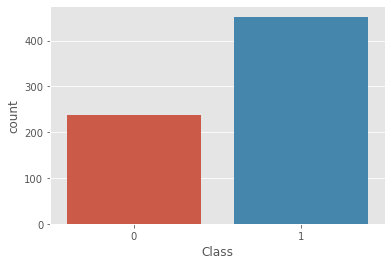

In [8]:
sns.countplot(x = 'Class',data = df);

df['Class'].value_counts()

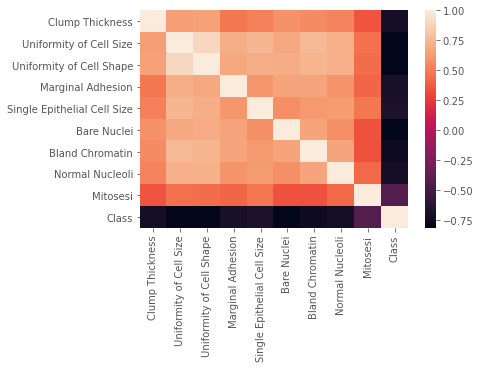

In [9]:
# Feature selection for model
sns.heatmap(df.corr());

In [10]:
df.corr()['Class']

Clump Thickness               -0.716812
Uniformity of Cell Size       -0.817586
Uniformity of Cell Shape      -0.817551
Marginal Adhesion             -0.701175
Single Epithelial Cell Size   -0.681063
Bare Nuclei                   -0.816655
Bland Chromatin               -0.756736
Normal Nucleoli               -0.715363
Mitosesi                      -0.423947
Class                          1.000000
Name: Class, dtype: float64

The <b> correlation scores </b>  above prove that there is signifance in the impact of the following variables towards predicting malignant cancer:

- Clump Thickness               -0.716001
- Uniformity of Cell Size       -0.817904
- Uniformity of Cell Shape      -0.818934
- Marginal Adhesion             -0.696800
- Single Epithelial Cell Size   -0.682785
- Bare Nuclei                   -0.817653
- Bland Chromatin               -0.756616
- Normal Nucleoli               -0.712244

All of the feautures above represent Negative-Strong Relationships

## 4. Spliting data into training and test sets

In [11]:
# segregate features and lables into separate variables
X= df.drop(['Class'], axis=1)
y=df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


<b>Hypothesis Testing</b>

Null hypthesis (H0) : The feature variables do not have a significant effect on the response variable 

Alternative Hypothesis (H1) : The at least one of the feature variables have a significant effect on the response variable 

In [12]:
#Adding constant column 
X1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X1).fit()
model.pvalues

const                          0.000000e+00
Clump Thickness                1.619573e-18
Uniformity of Cell Size        4.112652e-04
Uniformity of Cell Shape       1.023266e-02
Marginal Adhesion              1.465661e-01
Single Epithelial Cell Size    1.542283e-01
Bare Nuclei                    3.476695e-40
Bland Chromatin                1.006483e-04
Normal Nucleoli                2.822262e-06
Mitosesi                       6.216152e-01
dtype: float64

The pvalues above prove that there is signifance in the impact of the following variables towards predicting malignant cancer:

Clump Thickness:                  2.791906e-18 <br>
Uniformity of Cell Size:          5.462468e-04 <br>
Uniformity of Cell Shape:        6.308670e-03 <br>
Marginal Adhesion:                1.596158e-01 <br>
Single Epithelial Cell Size:      1.713468e-01 <br>
Bare Nuclei:                      9.192607e-42 <br>
Bland Chromatin:                  4.296908e-05 <br>
Normal Nucleoli:                  2.422993e-06 <br>

All of the pvalues that are presented above are all <0.05, therefore we reject the null hypothesis these features have a signifcant relationship efffect on predicting malignant cancer

In [13]:
# Transforming the Features
X,y = df.drop('Class', axis = 1) , df['Class']

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## 5. Fitting a logistic regression model to the train set

In [14]:
# Building a model
model = LogisticRegression()

#fitting the log regression to train set
model.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 6. Making predictions and evaluating performance

In [15]:
# Confussion matrix
predict_model = model.predict(rescaledX_test)
pred_model = model.predict(rescaledX_train)
labels = ['Malignant','Benign']

#Confusion matrix for test data
pd.DataFrame(data=confusion_matrix(predict_model, y_test), index=labels, columns=labels)

,Malignant,Benign
Malignant,57,2
Benign,6,142


In [16]:
#Confusion matrix for training data
pd.DataFrame(data=confusion_matrix(pred_model, y_train), index=labels, columns=labels)

,Malignant,Benign
Malignant,168,8
Benign,7,300


#### The confusion matrix for the test data  shows:

- 62+141 correct predictions
- 2 + 5 incorrect predictions

#### The confusion matrix for the train data shows:

- 165+308 correct predictions
- 7+9 incorrect predictions

## 7. Classification report

In [17]:
#Classification report

print('\nTest dataset-------------------------------------------')
print(classification_report(y_test, predict_model))
print('\nTrain dataset------------------------------------------')
print(classification_report(y_train, pred_model))


Test dataset-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.96      0.99      0.97       144

    accuracy                           0.96       207
   macro avg       0.96      0.95      0.95       207
weighted avg       0.96      0.96      0.96       207


Train dataset------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       175
           1       0.98      0.97      0.98       308

    accuracy                           0.97       483
   macro avg       0.97      0.97      0.97       483
weighted avg       0.97      0.97      0.97       483



The following calaculations are analysis made based on the above confusion matrix.

<b>Accuracy:</b>
Overall, how often is the classifier correct?
- Accuracy = TP+TN/(TP+TN+FN+FP)

<b>Precision:</b>
When it predicts begnin, how often is it correct?
- Precision= TP/(TP+FP)

<b>Recall:</b>
When it's actually begnin, how often does it predict begnin?
- Recall= TP/(TP+FN)

<b>F1-score:</b>
This is a weighted average of the true positive rate (recall) and precision
- F1_score = (2*Recall*Precision)/(Precision+Recall)

# 8. Receiver Operating Characteristic (ROC)

This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class

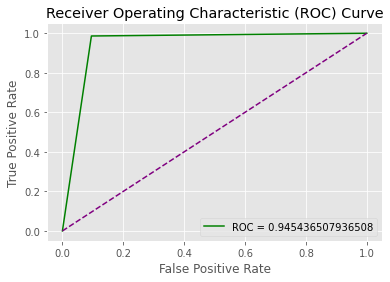

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

logreg_roc_auc = roc_auc_score(y_test, predict_model)
fpr, tpr, threshold_log = roc_curve(y_test, predict_model)

plt.plot(fpr, tpr, color='green', label=f'ROC = {logreg_roc_auc}')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 9. Model Stability

The further the curve is from the diagonal line, the better the model is at discriminating between positives and negatives in general. In our case the model gets to 0.955 True Positive Rate before the rate of False positive starts increasing rapidly.

Overdispersion occurs when error (residuals) are more variable than expected from the theorized distribution. In case of logistic regression, the theorized error distribution is the binomial distribution. The variance of binomial distribution is a function of its mean (or the parameter p). If there is overdispersion, the coeﬃcient estimates will be more conﬁdent (smaller standard error values) than they should be. One can detect overdispersion by comparing the residual deviance with the degrees of freedom. If these two numbers are close, there is no overdispersion\

# 10. References

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [ ]:
#convert to html file

import os

os.system('jupyter nbconvert --to html Breast_Cancer_Prediction.ipynb')